In [249]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [272]:
#Importing the cleaned dataset
dataset_name = 'Final_Data_for_Python.csv'
df = pd.read_csv(dataset_name)

In [276]:
df.head()
df_date_time = pd.to_datetime(df['Date'])
df_date_time = df_date_time.sort_values() 
df_date_time = df_date_time.reset_index(drop=True)

pandas.core.series.Series

In [277]:
print(type(df_date_time))
print(df_date_time.dtype)

<class 'pandas.core.series.Series'>
datetime64[ns]


#Need to get the mean amounnt of purchases made in each Month , Week, and season

1. Get a count of the amount of purchases made for each of those periods

In [286]:

# Define the list of values you want to check against.
day_count = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
days_gap = []
days = []
index = []

#checking how many days have passed since the first day
for i in range(len(df['Date'])):
    days_gap.append(df_date_time.iloc[i] - df_date_time.iloc[0])
    days.append(days_gap[i].days)
    
random_values = [5, 10, 15, 20]  # Example list of random values
indexed_values = [[i, value] for i, value in enumerate(days, start=1)]

[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [59, 0], [60, 0], [61, 0], [62, 0], [63, 0], [64, 0], [65, 0], [66, 0], [67, 0], [68, 0], [69, 0], [70, 0], [71, 0], [72, 0], [73, 0], [74, 0], [75, 0], [76, 0], [77, 0], [78, 0], [79, 0], [80, 0], [81, 0], [82, 0], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [90, 0], [91, 0], [92, 0], [93, 0], [94, 0], [95, 0], [96, 0], [97, 0], [98, 0], [99, 0], [100, 0], [101, 0], [102, 0], [103, 1], [104, 1], [105, 1], [106, 1], [107, 1], [108, 1], [109, 2], [110, 2], [111, 2

In [290]:
#Getting the indexes of when those days are multiples of 30
for i, (x, y) in enumerate(indexed_values):
    if y % 30 == 0:
        print(indexed_values[i])

[1, 0]
[2, 0]
[3, 0]
[4, 0]
[5, 0]
[6, 0]
[7, 0]
[8, 0]
[9, 0]
[10, 0]
[11, 0]
[12, 0]
[13, 0]
[14, 0]
[15, 0]
[16, 0]
[17, 0]
[18, 0]
[19, 0]
[20, 0]
[21, 0]
[22, 0]
[23, 0]
[24, 0]
[25, 0]
[26, 0]
[27, 0]
[28, 0]
[29, 0]
[30, 0]
[31, 0]
[32, 0]
[33, 0]
[34, 0]
[35, 0]
[36, 0]
[37, 0]
[38, 0]
[39, 0]
[40, 0]
[41, 0]
[42, 0]
[43, 0]
[44, 0]
[45, 0]
[46, 0]
[47, 0]
[48, 0]
[49, 0]
[50, 0]
[51, 0]
[52, 0]
[53, 0]
[54, 0]
[55, 0]
[56, 0]
[57, 0]
[58, 0]
[59, 0]
[60, 0]
[61, 0]
[62, 0]
[63, 0]
[64, 0]
[65, 0]
[66, 0]
[67, 0]
[68, 0]
[69, 0]
[70, 0]
[71, 0]
[72, 0]
[73, 0]
[74, 0]
[75, 0]
[76, 0]
[77, 0]
[78, 0]
[79, 0]
[80, 0]
[81, 0]
[82, 0]
[83, 0]
[84, 0]
[85, 0]
[86, 0]
[87, 0]
[88, 0]
[89, 0]
[90, 0]
[91, 0]
[92, 0]
[93, 0]
[94, 0]
[95, 0]
[96, 0]
[97, 0]
[98, 0]
[99, 0]
[100, 0]
[101, 0]
[102, 0]
[5681, 30]
[5682, 30]
[5683, 30]
[11011, 60]
[11012, 60]
[11013, 60]
[11014, 60]
[11015, 60]
[11016, 60]
[11017, 60]
[11018, 60]
[11019, 60]
[11020, 60]
[11021, 60]
[11022, 60]
[11023, 60]
[

In [254]:
row_separation = [5681 , 11011 , 17473 , 24921 , 32243 , 37912, 44455, 52167  , 60097 , 67889 , 76861 , 84650]

In [255]:
rows_searched = []

for i in range(1 , len(row_separation)):
    rows_searched.append(row_separation[i] - row_separation[i-1])
    
rows_searched

[5326, 6366, 7522, 7347, 5670, 6392, 7857, 7832, 7750, 9059, 7848]

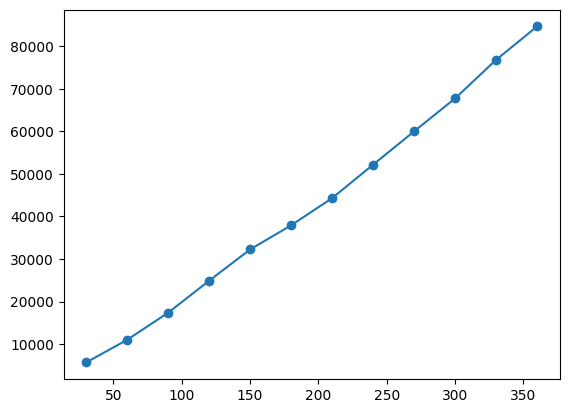

In [291]:
plt.scatter(day_count , row_separation)
plt.plot(day_count , row_separation)